In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette("Set2")

data = pd.read_excel(r'Land cover.xlsx')
data = data.iloc[: , :-18]
data = data[data.year >= 1990]

data['urban.land'].interpolate(method='linear', direction = 'forward', inplace=True) 

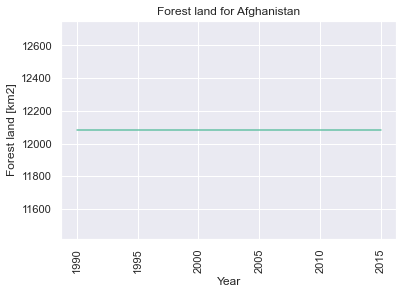

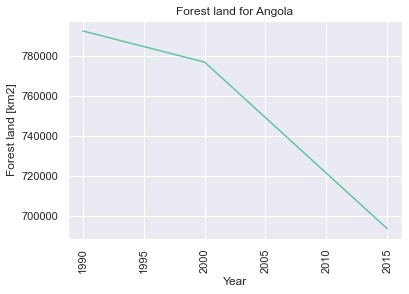

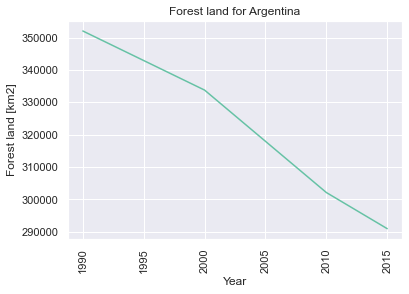

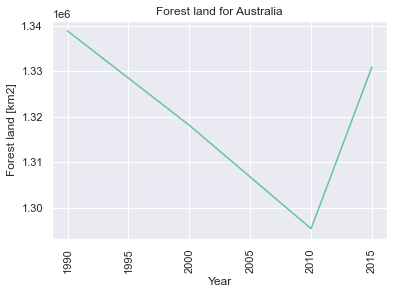

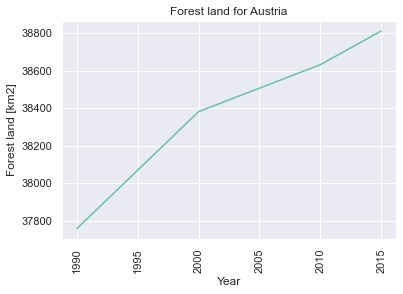

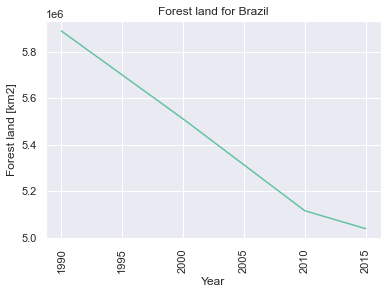

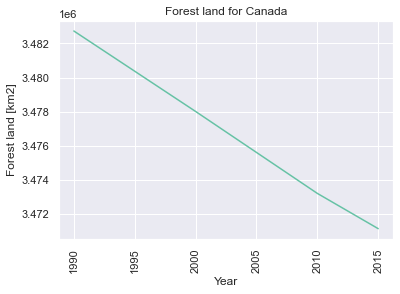

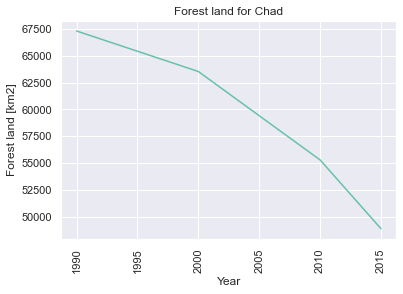

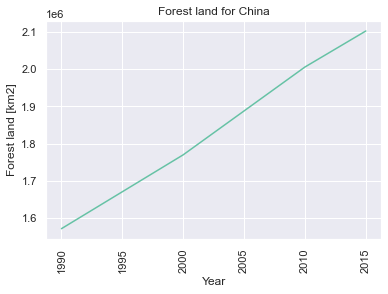

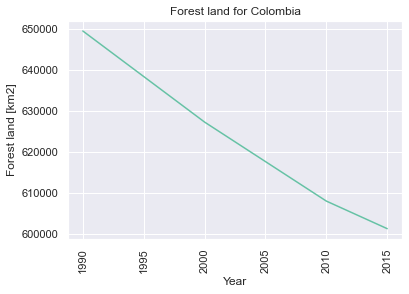

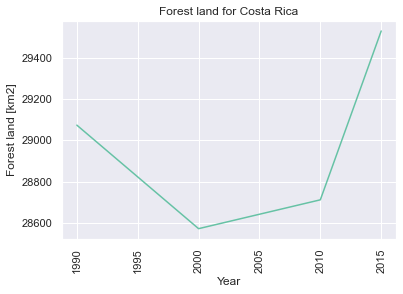

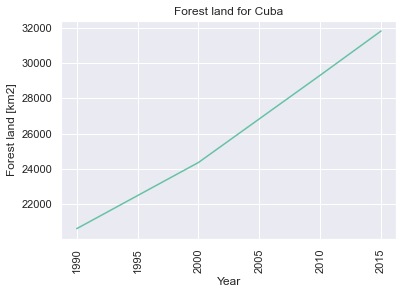

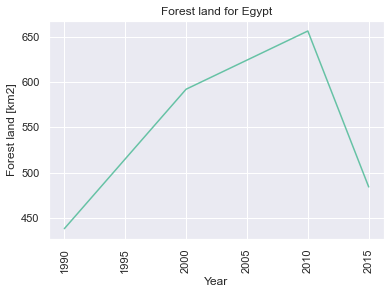

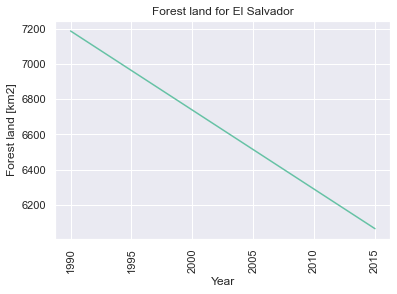

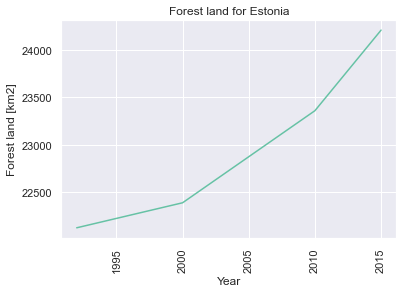

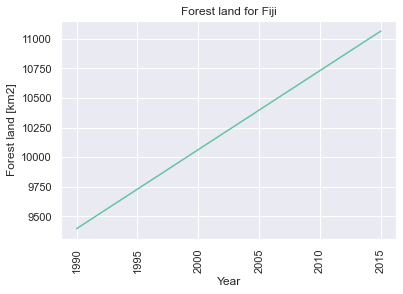

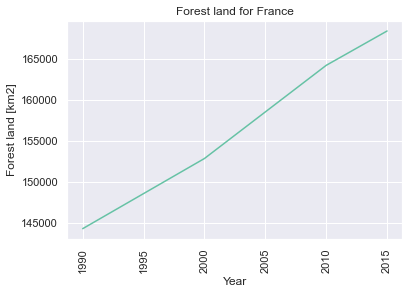

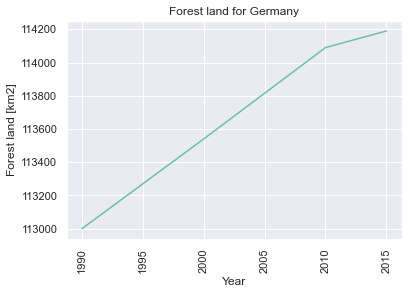

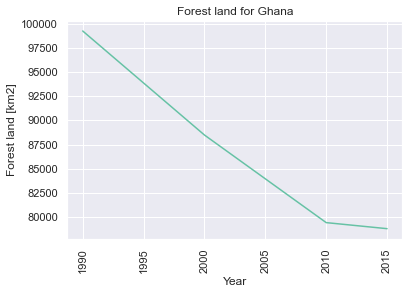

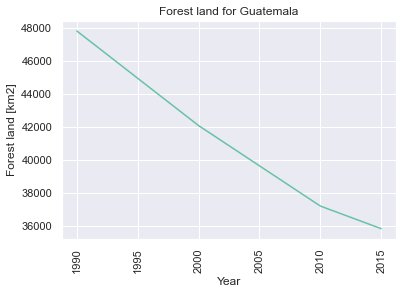

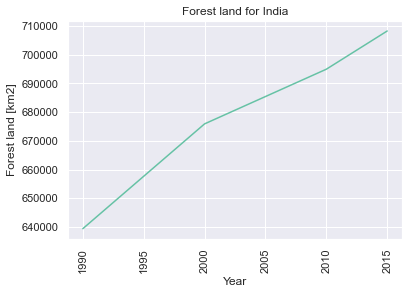

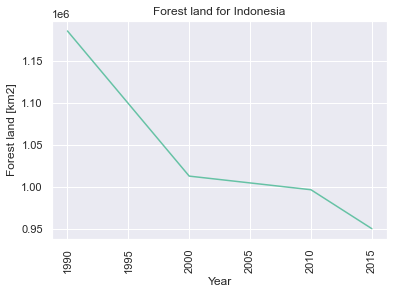

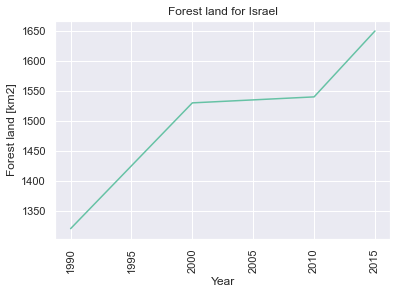

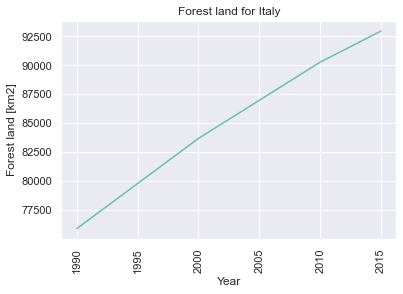

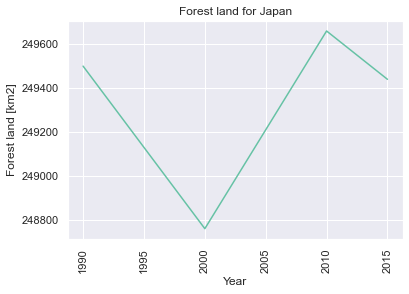

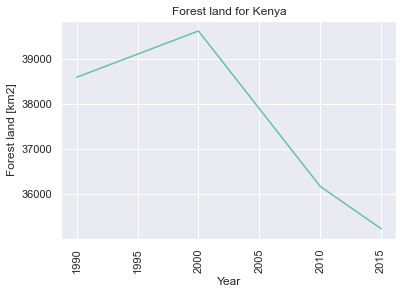

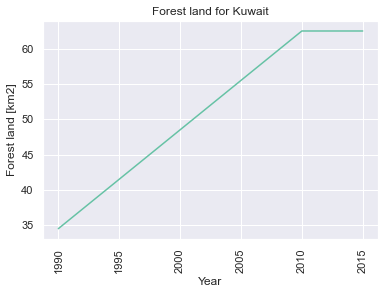

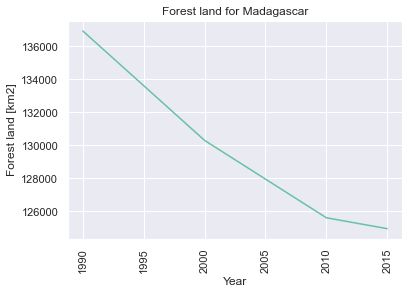

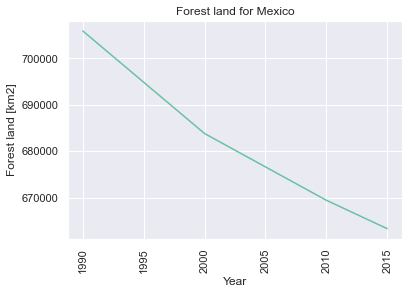

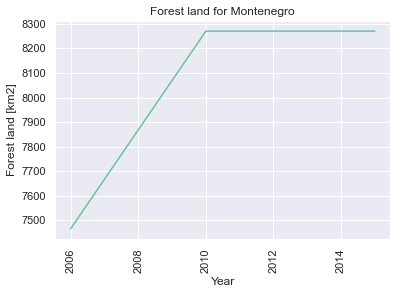

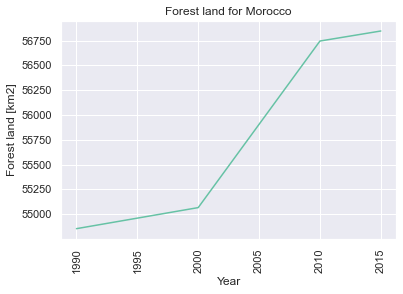

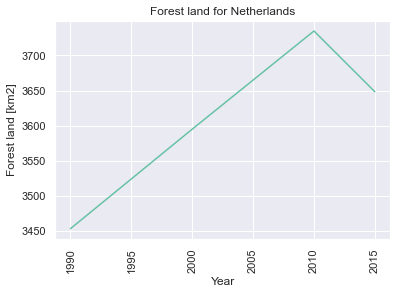

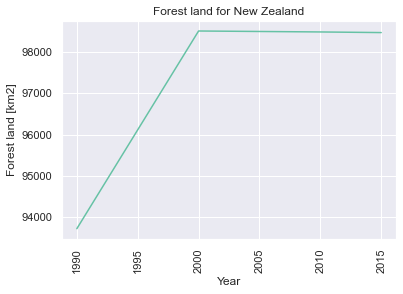

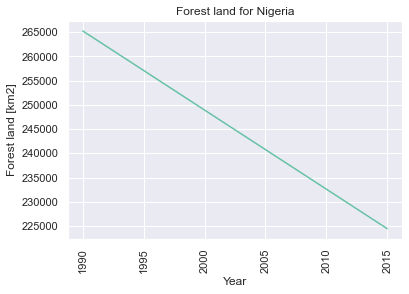

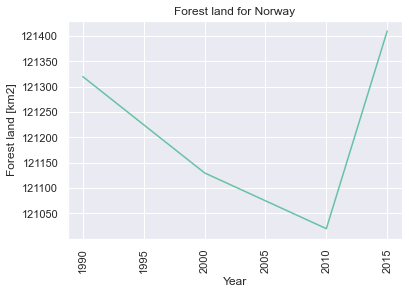

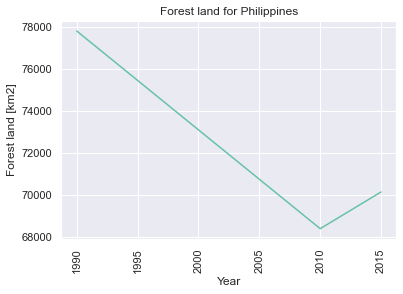

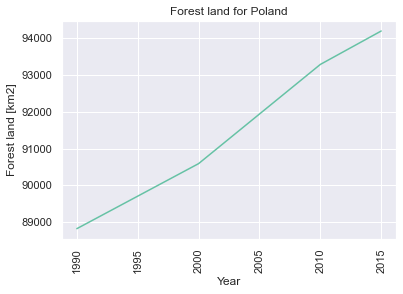

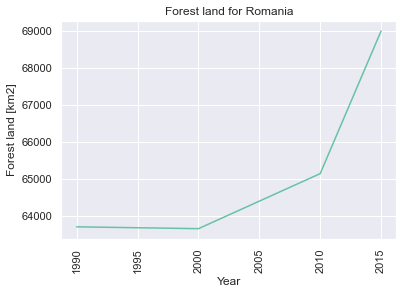

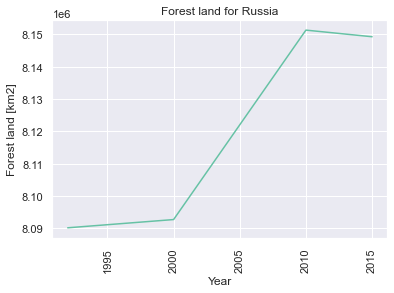

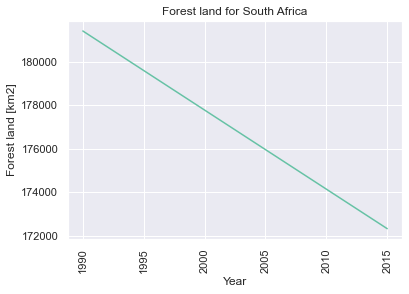

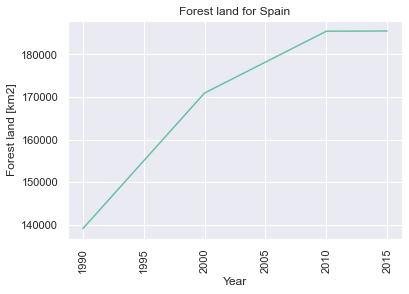

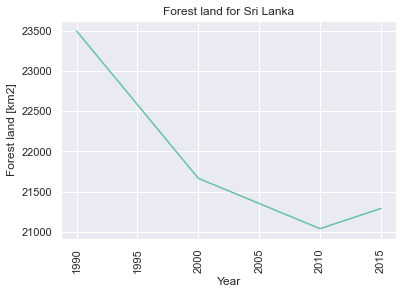

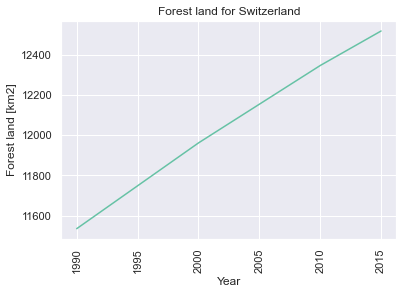

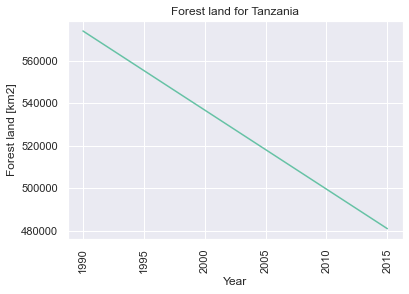

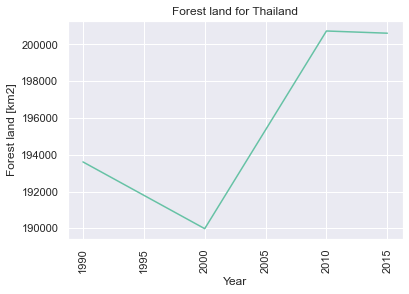

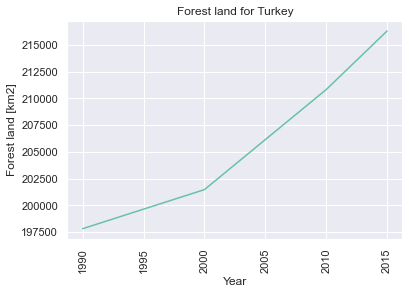

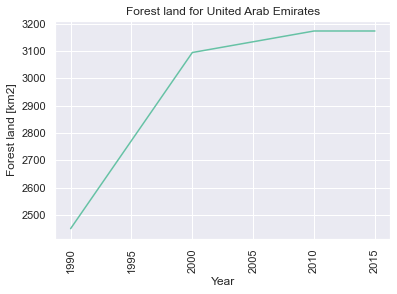

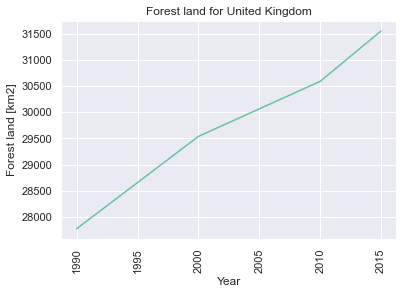

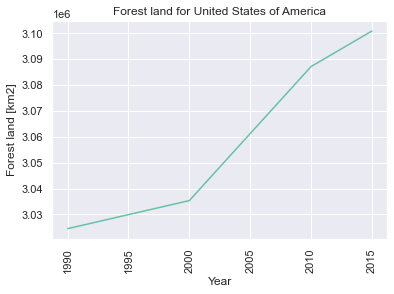

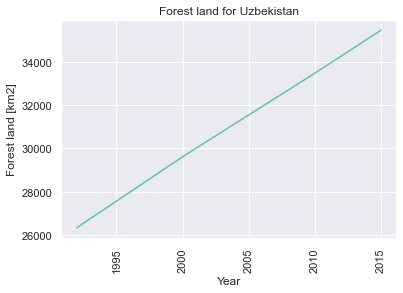

In [4]:
for _, d in data.set_index('year').groupby('country'):
    fig, ax = plt.subplots()
    d['forest.land'].plot()
    plt.xticks(rotation=90)
    plt.title(f"Forest land for {d['country'].iat[0]}")
    plt.xlabel('Year')
    plt.ylabel('Forest land [km2]')
    #plt.legend()
    plt.show()

In [5]:
d=data.groupby(['year'])['urban.land'].mean().reset_index(name='urban.land').set_index('year')

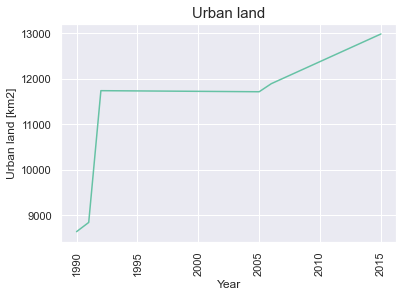

In [6]:
d['urban.land'].plot()
plt.xticks(rotation=90)
plt.title(f"Urban land", size=15)
plt.xlabel('Year')
plt.ylabel('Urban land [km2]')
plt.show()

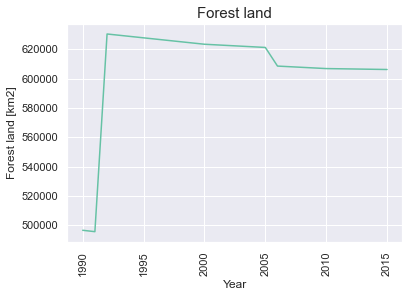

In [11]:
d=data.groupby(['year'])['forest.land'].mean().reset_index(name='forest.land').set_index('year')
d['forest.land'].plot()
plt.xticks(rotation=90)
plt.title(f"Forest land", size=15)
plt.xlabel('Year')
plt.ylabel('Forest land [km2]')
plt.show()

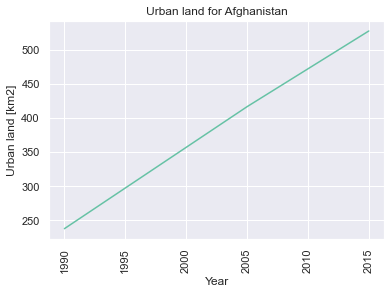

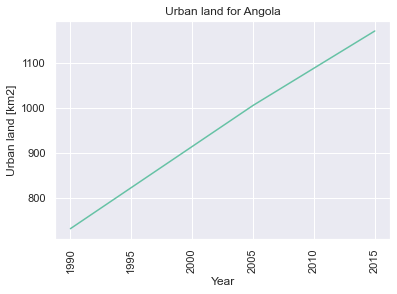

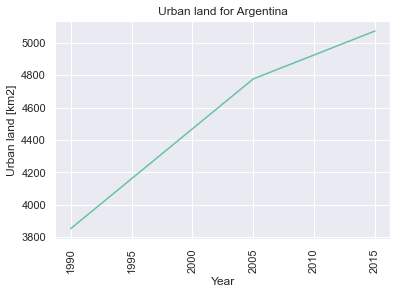

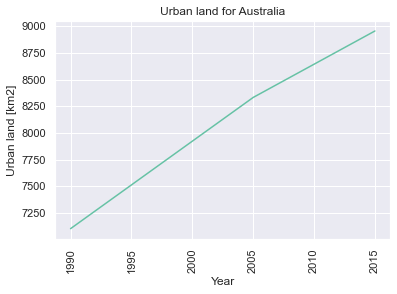

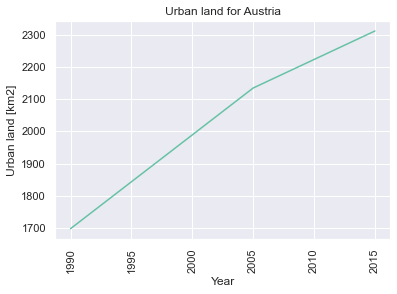

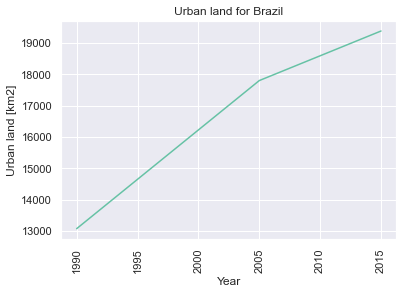

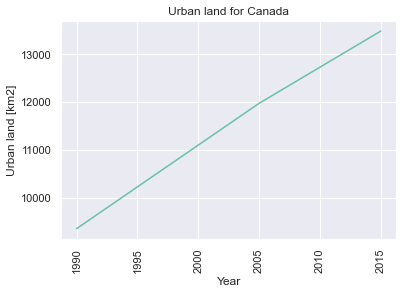

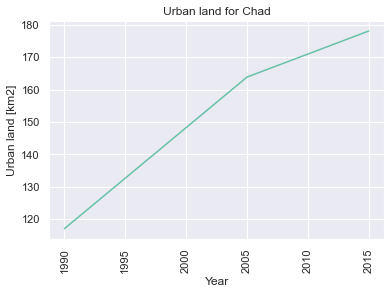

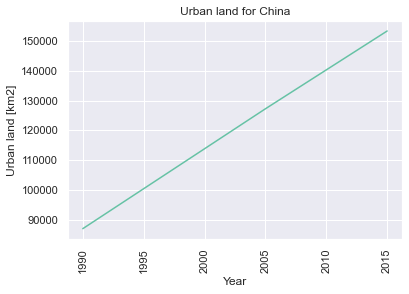

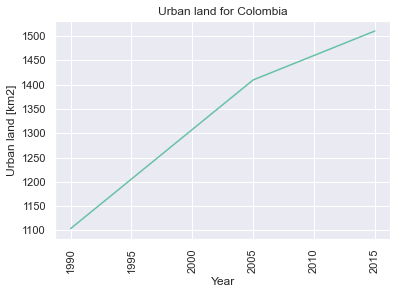

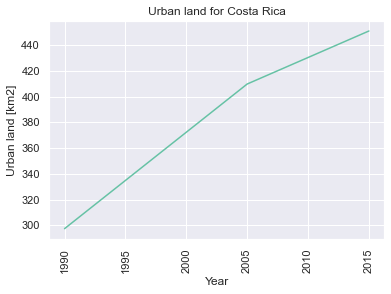

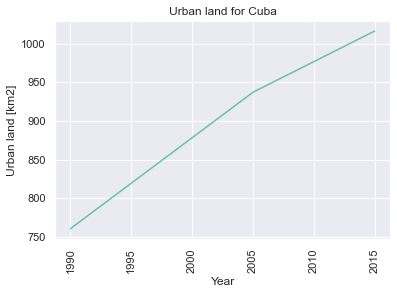

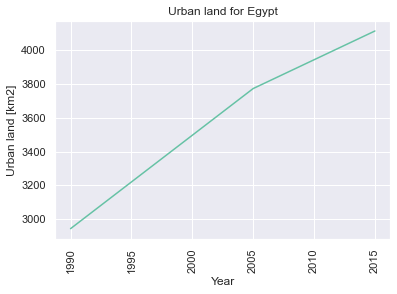

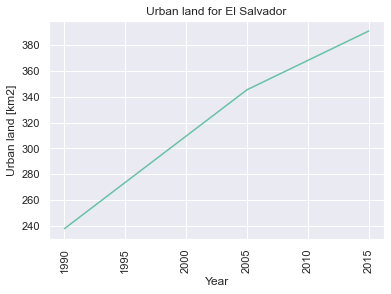

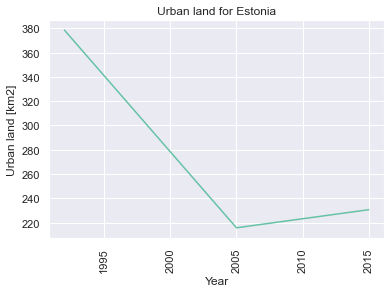

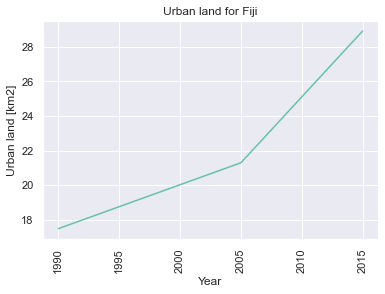

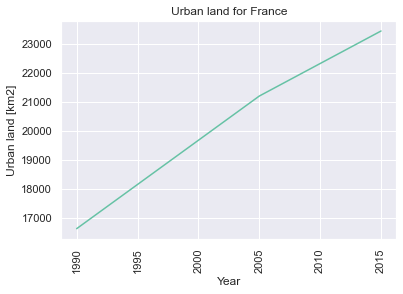

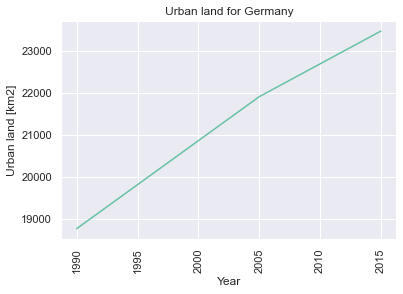

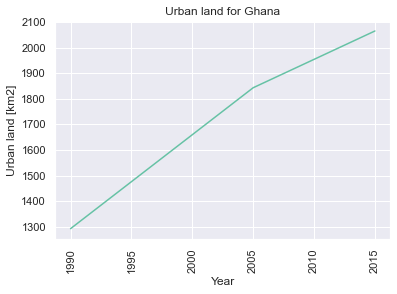

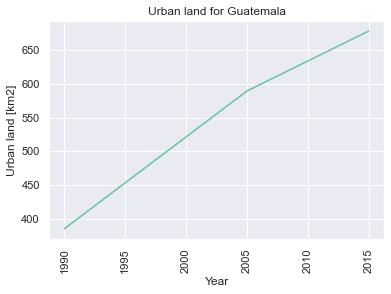

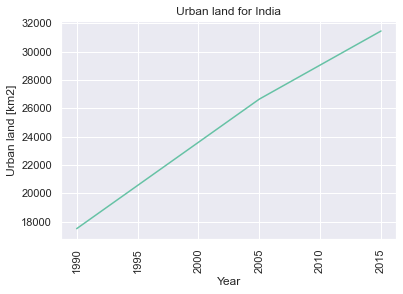

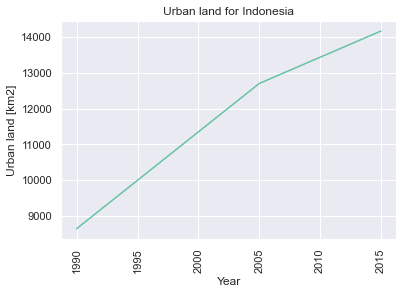

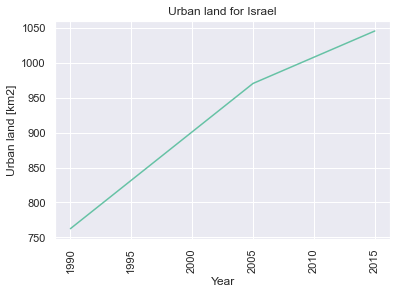

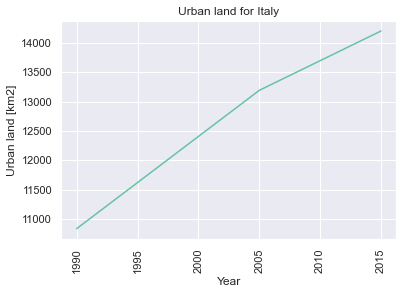

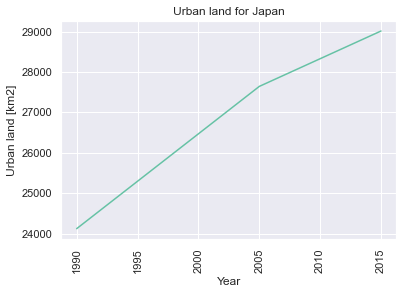

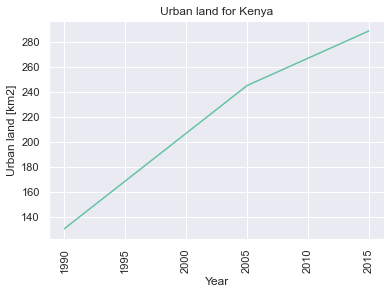

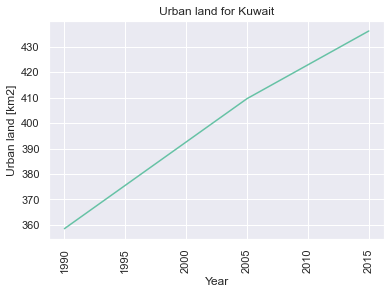

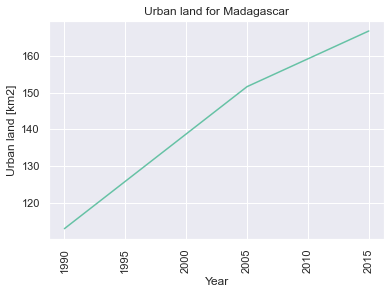

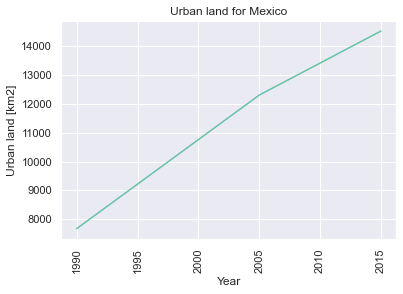

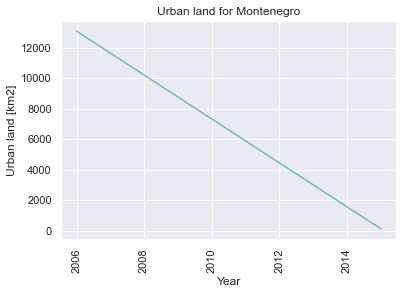

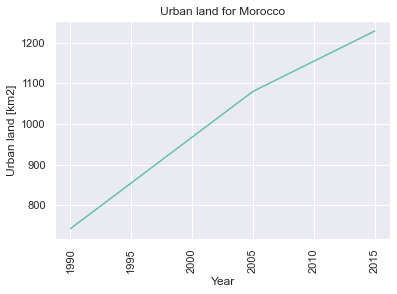

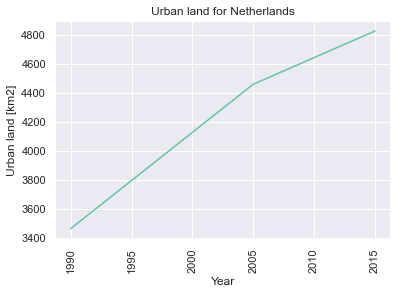

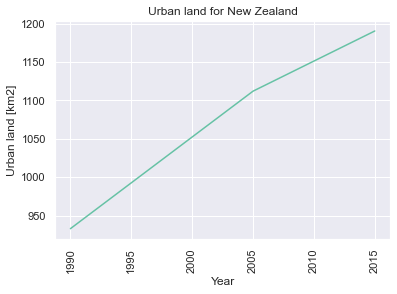

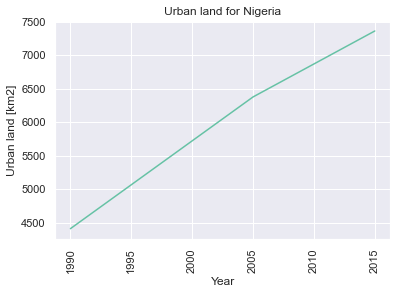

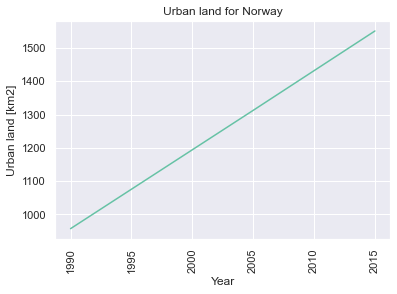

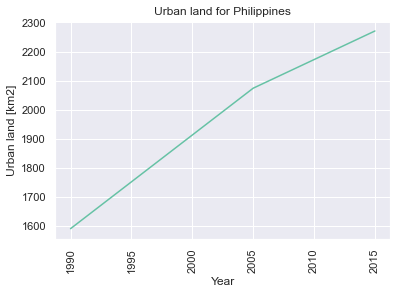

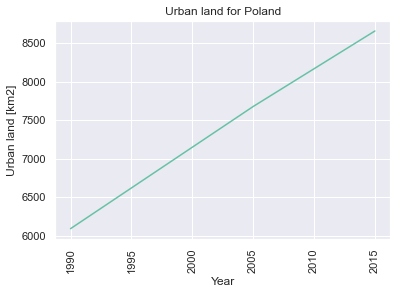

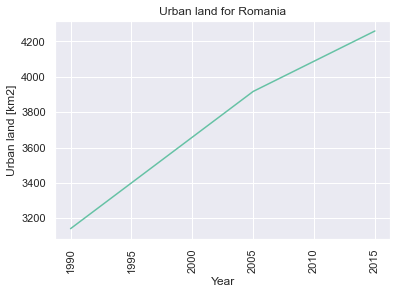

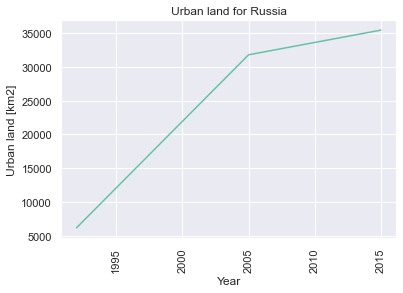

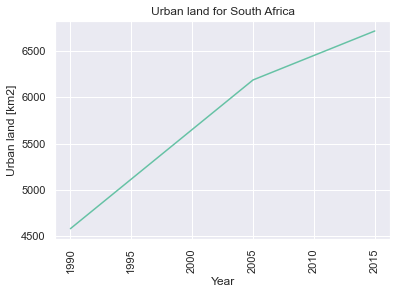

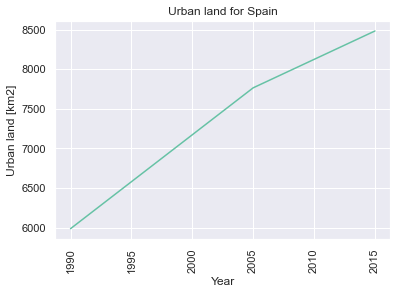

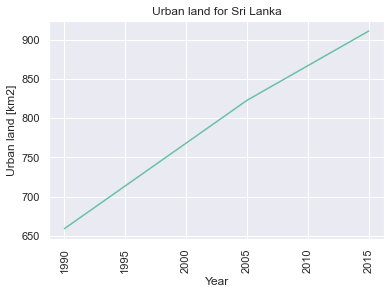

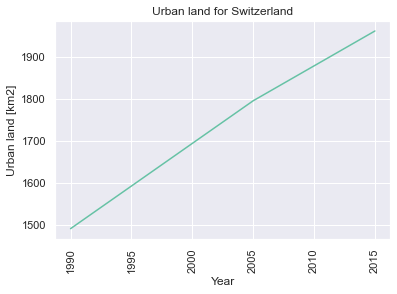

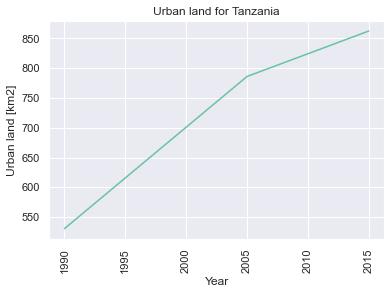

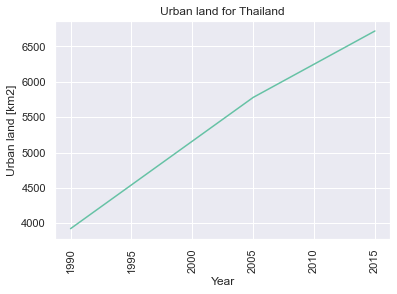

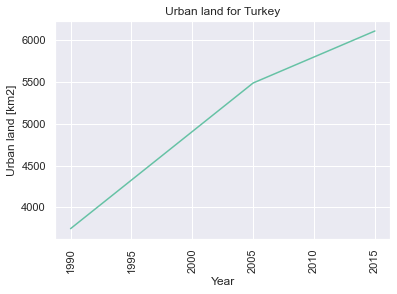

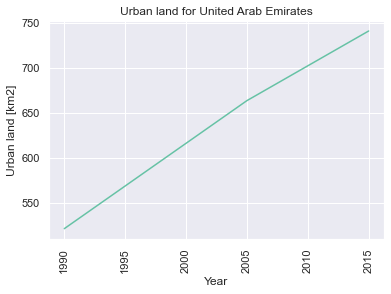

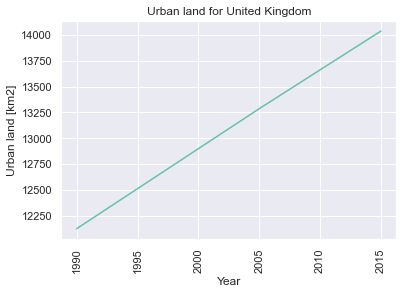

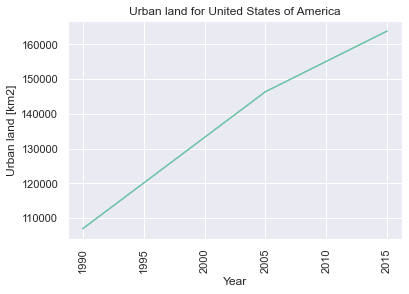

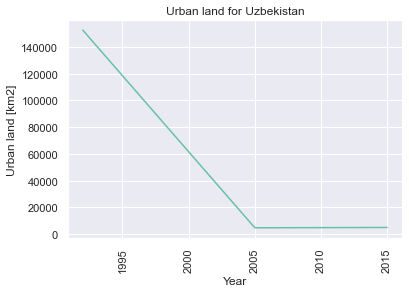

In [7]:
for _, d in data.set_index('year').groupby('country'):
    fig, ax = plt.subplots()
    d['urban.land'].plot()
    plt.xticks(rotation=90)
    plt.title(f"Urban land for {d['country'].iat[0]}")
    plt.xlabel('Year')
    plt.ylabel('Urban land [km2]')
    #plt.legend()
    plt.show()

In [8]:
data['forest.perc'] = data['forest.land']*100 / data['country.land']
data['inland.perc'] = data['inland.waters']*100 / data['country.land']
data['urban.perc'] = data['urban.land']*100 / data['country.land']
data['agricult.perc'] = data['agricult.land']*100 / data['country.land']
data['forest.inland.perc'] = data['forest.perc'] + data['inland.perc']
data['urban.agricult.perc'] = data['urban.perc'] + data['agricult.perc']

In [9]:
#creating new column with multiple conditions
conditions = [
    (data['forest.inland.perc'] >= 45) & (data['forest.inland.perc'] <= 55),
    (data['urban.agricult.perc'] >= 45) & (data['urban.agricult.perc'] <= 55),
    (data['forest.inland.perc'] < data['urban.agricult.perc']),
    (data['forest.inland.perc'] > data['urban.agricult.perc'])]

choices = ['balance', 'balance', 'human', 'nature']
data['land.dom'] = np.select(conditions, choices)

In [10]:
conditions = [
    (data['land.dom'] == 'human'),
    (data['land.dom'] == 'nature'),
    (data['land.dom'] == 'balance')]

choices = ['Not sustainable', 'Sustainable', 'Quite sustainable']
data['sust.level.land'] = np.select(conditions, choices)
data.to_excel(r'land_cover.xlsx')

Text(0, 0.5, 'Number of countries')

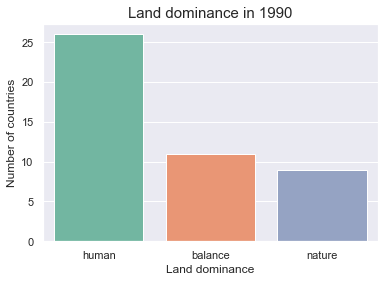

In [12]:
land1990 = data.loc[data['year'] == 1990]
ax = sns.countplot(x = "land.dom", data=land1990)
plt.title(f"Land dominance in 1990", size=15)
plt.xlabel('Land dominance')
plt.ylabel('Number of countries')

Text(0, 0.5, 'Number of countries')

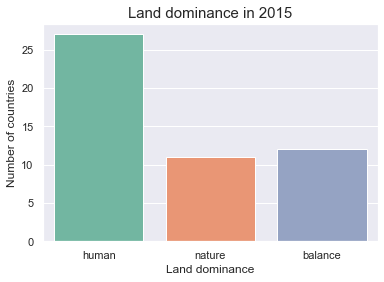

In [13]:
land2015 = data.loc[data['year'] == 2015]
ax = sns.countplot(x = "land.dom", data=land2015)
plt.title(f"Land dominance in 2015", size=15)
plt.xlabel('Land dominance')
plt.ylabel('Number of countries')